# **Onco-Logic - Robot Oncologist1**
---
## **Team Members**
*   Rahim Siddiq (risiddiq@csumb.edu)
*   Harris Popal (hapopal@csumb.edu)
*   Federico Marquez Murrieta (fedmarquezmurrieta@csumb.edu)
*   Nicholas Marolla (nmarolla@csumb.edu)

---
## **Project Overview**
Patients often struggle to interpret their symptoms and lab test results, leading to delayed medical consultations or reliance on unreliable online sources. This project aims to bridge this gap by providing an AI-powered medical chatbot that assists users in understanding symptoms and interpreting blood test results.

---
## **Selection of Data**

1. **Medical Chatbot:**  
    - Using the `patient_doctor_chatbot` dataset, we predict diagnostic clusters based on patient symptom descriptions and simulate a real-life consultation experience.
    - Contains 154,150 real-world patient-doctor dialogues, including symptoms, diagnoses, and treatment suggestions.
2. **Medical Disease Prediction:**  
   - blood test biomarkers for various diseases (Diabetes, Anemia, Thrombosis).
3. **Survival Prediction:**  
   - Leveraging data from UC Davis, we predict patient survival outcomes by analyzing disease type, demographic factors, and survival probability trends over time. The model estimates 5-year, 10-year, and 15-year survival rates, assisting in long-term health assessments.

### **Data Processing**:
- **Textual Data (Chatbot)**

  Preprocessing: Removal of stopwords, named entity recognition (NER) for symptom extraction.Feature Engineering: Uses Sentence-BERT embeddings to represent symptom descriptions and retrieve similar cases. Cleaning textual data, encoding diagnosis labels, and ensuring balanced splits between training and test sets.

- **Numerical Data (Biomarkers)**

  Handling Missing Values: Imputation using median values.
  Feature Selection: Identifying the most relevant biomarkers for disease prediction.

- **Numerical Data (Biomarkers & Survival Data)**

  Handling Missing Values: Imputation using median values for missing biomarkers and patient characteristics.
  Feature Engineering: Standardization and normalization of numerical variables.
  Feature Selection: Identifying the most relevant biomarkers using SHAP values and recursive feature elimination.
  Data Splitting: Ensuring balanced training and test sets for survival analysis and disease classification.

---
## **Methods Technologies and Tools**
-  Programming Languages: Python (Pandas, Numpy, Scikit-learn, TensorFlow, PyTorch)
-  NLP Model: Sentence-BERT (SBERT)
-  Machine Learning Algorithms: Logistic Regression, Random Forest, CatBoost, Naive Bayes
-  APIs & Libraries: Hugging Face, Spacy (NER), Streamlit (Web App)
-  Development Environment: Google Colab, Jupyter Notebook, Anaconda, Spyder

### Model Implementation
- Medical Chatbot (NLP)

  - Sentence-BERT embeddings for similarity retrieval.
  - Named Entity Recognition (NER) for extracting symptoms.
  - Finds the most similar case using cosine similarity.
  - Streamlit UI for user interaction.

- Disease Prediction (ML Model)

  - Feature selection from blood test biomarkers.
  - Training multiple classifiers (Logistic Regression, Random Forest, CatBoost).
  - Hyperparameter tuning for accuracy optimization.

- Disease & Survival Prediction (ML Model)
  
  - Feature selection from biomarkers and survival data.
  - Training multiple classifiers: Random Forest, Gradient Boosting, XGBoost, and Stacking Regressors.
  - Hyperparameter tuning: GridSearchCV for optimizing classifier performance.
  - Performance evaluation: Comparison of MAE, RMSE, and R² scores across different models.

---

## 1. Medical Chatbot

**Source:**  
[Sohaibsoussi/patient_doctor_chatbot on HuggingFace](https://huggingface.co/datasets/Sohaibsoussi/patient_doctor_chatbot)

**Description:**  
This dataset contains patient verbal communications that are summarized into general problem statements, which are then mapped to a corresponding doctor’s diagnosis. The idea is to simulate a realistic medical consultation through a chatbot interface.

**Prediction Goal:**  
Develop a system that, given a patient’s symptom description, predicts a diagnosis cluster (or specific condition) and provides corresponding doctor's advice.

**Key Features:**  
- **Patient Descriptions:** Free-text inputs describing symptoms.  
- **Preprocessed Text Features:**  Cleaned and embedded representations of the patient inputs using Sentence-BERT.
- **Doctor’s Diagnosis Labels:** The target variable, which maps each patient description to a diagnosis or treatment recommendation.

---

## 2. Medical Disease Prediction

**Source:**  
[Kaggle - Multiple Disease Prediction](https://www.kaggle.com/datasets/ehababoelnaga/multiple-disease-prediction/data)  
Files: `Blood_samples_dataset_balanced_2.csv` and `blood_samples_dataset_test.csv`

**Description:**  
This dataset comprises detailed blood test results containing various biomarkers. The balanced training set and a separate test set are used to develop a predictive model.

**Prediction Goal:**  
Build a machine learning model to predict the underlying disease or condition based on the values of blood markers. The model will analyze multiple biomarkers from blood test results to interpret and forecast the patient's health status.

**Key Features:**  
- **Blood Marker Values:** Quantitative measurements from blood tests (e.g., levels of hemoglobin, white blood cells, etc.).  
- **Additional Clinical Variables:** If available, demographic or clinical factors that may influence the prediction.

---
## 3. Survival Prediction

**Source:**  
[Survival and relapse in patients with thrombotic thrombocytopenic purpura](https://pubmed.ncbi.nlm.nih.gov/20032506/)


[Improved survival in both men and women with diabetes between 1980 and 2004 – a cohort study in Sweden](https://pmc.ncbi.nlm.nih.gov/articles/PMC2586621/)


[The survival rate of patients with beta-thalassemia major and intermedia and its trends in recent years in Iran](https://pmc.ncbi.nlm.nih.gov/articles/PMC6335498/)


[Incidence and outcome of acquired aplastic anemia: real-world data from patients diagnosed in Sweden from 2000-2011](https://pubmed.ncbi.nlm.nih.gov/28751565/)


Files: `survival_data.csv` and
`Blood_samples_dataset_balanced_2.csv`, and
`blood_samples_dataset_test.csv`


**Description:**  
This dataset contains survival data for patients with various medical conditions, segmented by disease type, gender, and age group. The dataset includes survival probabilities at 5-year, 10-year, and 15-year intervals, enabling predictive modeling for long-term health outcomes.


**Prediction Goal:**  
Develop a machine learning model to predict survival rates based on disease type, demographic factors, and key biomarkers. The model will assess patient risk and estimate long-term survival probabilities, aiding in prognosis and decision-making.


**Key Features:**  
- **Disease Type:** Includes survival data for Diabetes, Thalassemia, Aplastic Anemia, and Thrombotic Thrombocytopenic Purpura (TTP).  
- **Demographics:** Gender and age group segmentation (e.g., 0-40, 40-60, 60+) to analyze survival variations.  
- **Survival Probabilities:**
5-Year Survival Rate: Short-term survival likelihood.
10-Year Survival Rate: Mid-term prognosis estimation.
15-Year Survival Rate: Long-term survival projection.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# Implementation

### Using pydrive to access shared folder and download project files into colab environment.

In [ ]:
!pip install -q pydrive2

### Authenticate user with pydrive in order to access shared project folder

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

# Initialize GoogleAuth and set credentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

# Initialize GoogleDrive with the authenticated GoogleAuth instance
drive = GoogleDrive(gauth)

### Check access to shared folder for the project in Google Drive and list files and folders.

In [ ]:
folder_id = '18vnDLs39XXMKyqdfVeFCMHtehOWpnjnL'

# List all files in the specified folder
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()


for file in file_list:
    print(f"Title: {file['title']}, ID: {file['id']}")

Title: onco-logic.ipynb, ID: 1sKNSVVrBm0OC0x0BKJkUf8RWrRwJM5yf
Title: CST489/499 Online Capstone Proposal, ID: 17a2KL2wHKHP5LUFGWYwh03F-vXrLXlN6-oir_7S5Qxc
Title: Copy of CST489/499 Online Capstone Proposal, ID: 17mPxcV7NjuWspmtTcT43jBb2CjK0AFwzgZdFjHhPH9c
Title: Breast_Cancer.csv, ID: 1WblxRWWQxbBk5j0jdVtIpRwYCqRWnx03
Title: models, ID: 1tzl4IrKarl_yRGHkR4vzDQuicGPiXRkf
Title: pages, ID: 1SAK2-zTlgTDqdhoWjsCq8WNn0Vva3au3
Title: medschool, ID: 106Ym4Vh8AR9X9xVnTUbO-1HDcX8UJ_J-
Title: processed_data.csv, ID: 1jxRz-d21qwPMJvm16iTGB8Q05npbYXwJ
Title: blood_samples_dataset_test.csv, ID: 1spBhi1C9jVl4GGLhaIa9lulGSvnUVo36
Title: train_data2.csv, ID: 1ZXoGkb8EhN0J_IR12thXIzUjKLrucAed
Title: Blood_samples_dataset_balanced_2.csv, ID: 12b2gdncc0UFJkvoHThbzbLnpMn7tCfm9
Title: Copy of blood_samples_dataset_test.csv, ID: 1IjNsuqJQCwaVIkSxcX7VIkWO07EYh055
Title: survival_data.csv, ID: 1d7_4GPKkdq3huTTjhMNvUCS9hqljIdpr
Title: train_data3.csv, ID: 1kvvkPx7XJ9DGCAHbye0QqUSlsMF5RdJE


### Download all the files ending with .csv, .ipynb, and .py into the colab environment.

In [ ]:
filtered_files = [file for file in file_list if file['title'].endswith('.csv') or file['title'].endswith('.ipynb') or file['title'].endswith('.py')]

for file in filtered_files:
    print(f"⬇️ Downloading: {file['title']} ...")
    file.GetContentFile(file['title'])  # Save file in Colab

print("✅ Download completed!")

⬇️ Downloading: onco-logic.ipynb ...
⬇️ Downloading: Breast_Cancer.csv ...
⬇️ Downloading: processed_data.csv ...
⬇️ Downloading: blood_samples_dataset_test.csv ...
⬇️ Downloading: train_data2.csv ...
⬇️ Downloading: Blood_samples_dataset_balanced_2.csv ...
⬇️ Downloading: Copy of blood_samples_dataset_test.csv ...
⬇️ Downloading: survival_data.csv ...
⬇️ Downloading: train_data3.csv ...
✅ Download completed!


### Make a directory called pages and pull in all the .py scripts from the pages folder for the project from Google Drive.

In [ ]:
import os

subfolder = "pages"
if not os.path.exists(subfolder):
    os.makedirs(subfolder)

pages_folder_id = '1SAK2-zTlgTDqdhoWjsCq8WNn0Vva3au3'

pages_file_list = drive.ListFile({
    'q': f"'{pages_folder_id}' in parents and trashed=false"
}).GetList()

print("Files in the 'pages' folder on Drive:")
for file in pages_file_list:
    print(f"Title: {file['title']}, ID: {file['id']}")

for file in pages_file_list:
    destination = os.path.join(subfolder, file['title'])
    print(f"⬇️ Downloading: {file['title']} to {destination} ...")
    file.GetContentFile(destination)

print("✅ Download completed!")


Files in the 'pages' folder on Drive:
Title: BreastCancerEDA.py, ID: 1GLlDkk8dgImAXmzJRfAKiUbv2uEgL3X1
Title: disease_prediction.py, ID: 1OkCtgqTSBzyG2KHAWUqYi3Yg0EAJky9K
Title: accuracy_comparison.py, ID: 1ovcvK_TPWpi3SSUDXfsyPthKr-EnkGGY
Title: survival accuracy comparison.py, ID: 1jz41MOQnx7VBLN1RW6aOYIilkQuzz6gl
Title: advanced_visuals.py, ID: 1oiyuDq5WUZaHSOf3KAHLNaZwgXhva2Fr
Title: survival_prediction.py, ID: 1uGmWzB9kA-yWw1n0yDJOGbNS1Aai7Yt8
Title: diseases.py, ID: 1lWefYGgevEEeonWrK6aes4w8yVeIZm3e
⬇️ Downloading: BreastCancerEDA.py to pages/BreastCancerEDA.py ...
⬇️ Downloading: disease_prediction.py to pages/disease_prediction.py ...
⬇️ Downloading: accuracy_comparison.py to pages/accuracy_comparison.py ...
⬇️ Downloading: survival accuracy comparison.py to pages/survival accuracy comparison.py ...
⬇️ Downloading: advanced_visuals.py to pages/advanced_visuals.py ...
⬇️ Downloading: survival_prediction.py to pages/survival_prediction.py ...
⬇️ Downloading: diseases.py to pages/

### Creating directories for training models and directories to house trained models to speed up run time.

In [ ]:
subfolder1 = "models"
if not os.path.exists(subfolder1):
    os.makedirs(subfolder1)

subfolder2a = "models/models"
if not os.path.exists(subfolder2a):
    os.makedirs(subfolder2a)

subfolder2ai = "models/models/data"
if not os.path.exists(subfolder2ai):
    os.makedirs(subfolder2ai)

subfolder2b = "models/catboost_info"
if not os.path.exists(subfolder2b):
    os.makedirs(subfolder2b)

subfolder2bi = "models/catboost_info/learn"
if not os.path.exists(subfolder2bi):
    os.makedirs(subfolder2bi)

models_folder_id = '1tzl4IrKarl_yRGHkR4vzDQuicGPiXRkf'
model_files = drive.ListFile({'q': f"'{models_folder_id}' in parents and trashed=false"}).GetList()
filtered_model_files = [file for file in model_files if file['title'].endswith('.py')]
print(filtered_model_files)
for file in filtered_model_files:
    destination1 = os.path.join(subfolder1, file['title'])
    print(f"⬇️ Downloading: {file['title']} ...")
    file.GetContentFile(destination1)

modeld_data_id = '1WP3ZypQ8Z-79PeZJ4Ta_D2cBCWI7F3-N'
model_data_files = drive.ListFile({'q': f"'{modeld_data_id}' in parents and trashed=false"}).GetList()
filtered_model_data_files = [file for file in model_data_files if file['title'].endswith('.csv')]
for file in filtered_model_data_files:
    destination2 = os.path.join(subfolder2ai, file['title'])
    print(f"⬇️ Downloading: {file['title']} ...")
    file.GetContentFile(destination2)
print("✅ Download completed!")

[GoogleDriveFile({'userPermission': {'kind': 'drive#permission', 'etag': '"a0zDGsPk2fX-_W2cGHHzCciXhko"', 'id': 'me', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1ARgP7xTVbLdo7xSoeiFqNoSg444A94ZO/permissions/me', 'role': 'writer', 'type': 'user', 'pendingOwner': False}, 'ownerNames': ['Rahim Siddiq'], 'parents': [{'kind': 'drive#parentReference', 'id': '1tzl4IrKarl_yRGHkR4vzDQuicGPiXRkf', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1ARgP7xTVbLdo7xSoeiFqNoSg444A94ZO/parents/1tzl4IrKarl_yRGHkR4vzDQuicGPiXRkf', 'parentLink': 'https://www.googleapis.com/drive/v2/files/1tzl4IrKarl_yRGHkR4vzDQuicGPiXRkf', 'isRoot': False}], 'lastModifyingUser': {'displayName': 'Rahim Siddiq', 'kind': 'drive#user', 'isAuthenticatedUser': False, 'permissionId': '14162697315137797788', 'emailAddress': 'rsiddiq@csumb.edu', 'picture': {'url': 'https://lh3.googleusercontent.com/a/ACg8ocKqULaiDobTTYHpVYEf1x_6-SZZKmpitxSOpruvkMFdpWSwFQ=s64'}}, 'owners': [{'displayName': 'Rahim Siddiq', 'kind': 

In [ ]:
folder_id = "106Ym4Vh8AR9X9xVnTUbO-1HDcX8UJ_J-"
local_folder = "/content/medschool"
os.makedirs(local_folder, exist_ok=True)

file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()

for file in file_list:
    if file['title'].endswith('.npy'):  # Automatically finds .npy files
        destination = os.path.join(local_folder, file['title'])
        print(f"Downloading {file['title']} to {destination} ...")
        file.GetContentFile(destination)
        print("Download completed!")

Download completed!


### Download dependencies needed throughout the project into the colab environment.

In [ ]:
!pip install streamlit -q
!pip install nltk -q
!pip install spacy -q
!pip install pyngrok -q
!pip install catboost -q
!pip install supertree -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.5/321.5 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.0 MB/s eta 0:00:00


### Train models required by scripts in pages subfolder.

Training Random Forest...
Random Forest Accuracy: 0.9577
               precision    recall  f1-score   support

       Anemia       1.00      0.95      0.98       106
     Diabetes       0.89      1.00      0.94       125
      Healthy       0.98      1.00      0.99        85
Heart Disease       0.00      0.00      0.00         6
  Thalassemia       1.00      0.94      0.97        83
     Thromboc       1.00      0.90      0.95        21

     accuracy                           0.96       426
    macro avg       0.81      0.80      0.80       426
 weighted avg       0.95      0.96      0.95       426

Training Naive Bayes...
Naive Bayes Accuracy: 0.7864
               precision    recall  f1-score   support

       Anemia       0.79      0.82      0.81       106
     Diabetes       0.75      0.90      0.82       125
      Healthy       0.87      0.78      0.82        85
Heart Disease       0.50      0.17      0.25         6
  Thalassemia       0.72      0.61      0.66        83
     T

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.7746
               precision    recall  f1-score   support

       Anemia       0.84      0.92      0.88       106
     Diabetes       0.68      0.75      0.71       125
      Healthy       0.82      0.82      0.82        85
Heart Disease       0.00      0.00      0.00         6
  Thalassemia       0.83      0.59      0.69        83
     Thromboc       0.86      0.90      0.88        21

     accuracy                           0.77       426
    macro avg       0.67      0.67      0.67       426
 weighted avg       0.78      0.77      0.77       426

Training Decision Tree...
Decision Tree Accuracy: 0.9413
               precision    recall  f1-score   support

       Anemia       0.94      0.96      0.95       106
     Diabetes       0.96      0.91      0.93       125
      Healthy       0.94      1.00      0.97        85
Heart Disease       0.50      0.17      0.25         6
  Thalassemia       0.94      0.96      0.95        83
     Thromboc       0.

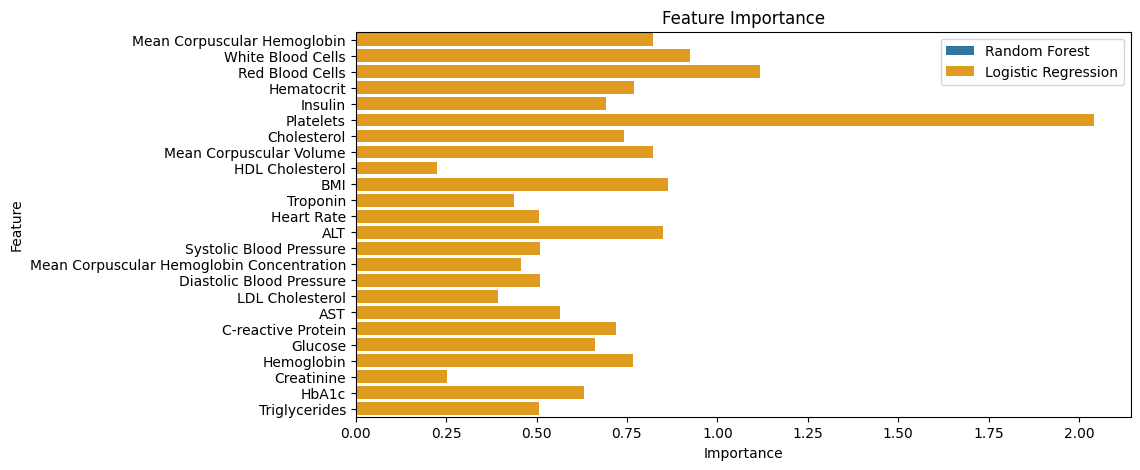

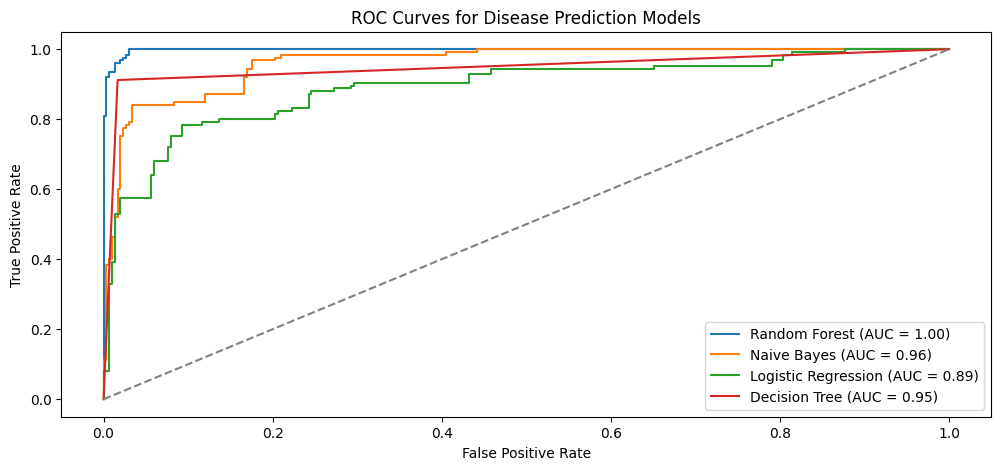


🔹 Training models for Survival_5Y...
   Training Random Forest for Survival_5Y...
   Training Linear Regression for Survival_5Y...
   Training Support Vector Machine for Survival_5Y...
   Training XGBoost for Survival_5Y...
   Training LightGBM for Survival_5Y...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 0
[LightGBM] [Info] Start training from score 76.287499
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped tr

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


   Training Stacking Ensemble for Survival_5Y...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 0
[LightGBM] [Info] Start training from score 76.287499
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 12, number of used features: 0
[LightGBM] [Info] Start training from score 73.408333
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 0
[LightGBM] [Info] Start training from score 61.406250
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 12, number of used features: 0
[LightGBM] [Info] Start training from score 58.875000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 0
[LightGBM] [Info] Start training from score 44.437500
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<Figure size 640x480 with 0 Axes>

In [ ]:
%run models/train_models.py
%run models/train_survival_model.py

### Import statements for medical_chatbot. Using magic commands to write code to script for streamlit user interface.

In [ ]:
%%writefile app.py
# -*- coding: utf-8 -*-
import streamlit as st
import pandas as pd
import re
import nltk
import spacy
import numpy as np
import os
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer, util
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

Writing app.py


### Download dependencies from Natural Language Toolkit (nltk)

In [ ]:
%%writefile -a app.py
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Appending to app.py


### Spacy Natural Language Processing (nlp)

In [ ]:
%%writefile -a app.py
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

Appending to app.py


### Loading Dataframe from small sample of original dataset.
This is for demonstration purposes, due to compute limitations the original dataset of 150k rows is trimmed to 10k and processed locally. Sample only contains a few hundred rows to demonstrate how processing was accomplished.

In [ ]:
%%writefile -a app.py
# Small sample dataset
df = pd.read_csv('/content/train_data3.csv')

Appending to app.py


### Pre-processing and cleaning of 'Description' column. Duplicate patient data is dropped.

In [ ]:
%%writefile -a app.py
df['Description'] = df['Description'].str.replace(r'^Description:\s*', '', regex=True)
df['Description'] = df['Description'].str.replace(r'^Q\.\s*', '', regex=True)
df = df[['Patient', 'Description', 'Doctor']]
df = df.drop_duplicates(subset=['Patient'])

Appending to app.py


### Pre-compile regex patterns needed to clean text and build stop words set combining NLTK stopwords with additonal words to screen.

In [ ]:
%%writefile -a app.py
number_pattern = re.compile(r'\d+')
special_char_pattern = re.compile(r'\W+')

STOP_WORDS = set(stopwords.words('english')).union({
    'hi', 'hello', 'doctor', 'year', 'old', 'thanks', 'yrs', 'suggest', 'remedy', 'treatment',
    'years', 'patient', 'patients', 'dear', 'sir', 'thank', 'cure', 'reason', 'treated', 'cause',
    'age', 'name', 'doc', 'please', 'help', 'causes', 'suggestion', 'could', 'want', 'treat'
})

Appending to app.py


### Text processing functions.
*   def clean_text(text): Lowercase the text, remove numbers and special characters, and filter out common stopwords.
*   def deduplicate_tokens(text): Remove duplicate tokens.
*   def extract_medical_entities(text): Extracts medical entities (e.g., symptoms, diseases) from text using spaCy's NER.
    *   If no entities fallback to cleantext





In [ ]:
%%writefile -a app.py
def clean_text(text):
    text = text.lower()
    text = number_pattern.sub('', text)  # Remove numbers
    text = special_char_pattern.sub(' ', text)  # Remove special characters
    words = (w for w in text.split() if w not in STOP_WORDS)
    return " ".join(words)

def deduplicate_tokens(text):
    tokens = text.split()
    return " ".join(dict.fromkeys(tokens))

def extract_medical_entities(text):
    doc = nlp(text)
    medical_labels = {"DISEASE", "SYMPTOM", "CONDITION", "MEDICATION"}  # Define entity labels of interest
    entities = [ent.text for ent in doc.ents if ent.label_ in medical_labels]
    extracted = " ".join(entities) if entities else clean_text(text)  # Fallback to cleaned text if no entities
    return deduplicate_tokens(extracted)

Appending to app.py


### Apply text cleaning and entity extraction to the dataframe columns.

In [ ]:
%%writefile -a app.py
df['Clean_Symptoms'] = df['Patient'].apply(extract_medical_entities)
df['Clean_Description'] = df['Description'].apply(extract_medical_entities)

Appending to app.py


### Import larger set processed with local resources using the code above.

In [ ]:
%%writefile -a app.py
df = pd.read_csv('/content/processed_data.csv')

Appending to app.py


### Split data into train and test sets. 80% of the data is used for training (retrieval storage). 20% is used for testing (querying the retrieval system).

In [ ]:
%%writefile -a app.py
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

Appending to app.py


### Load Sentence-BERT(SBERT) model specifically trained for medical domain.

In [ ]:
%%writefile -a app.py
@st.cache_resource
def load_sbert_model():
    # Load the medical-specific SentenceTransformer model.
    return SentenceTransformer('pritamdeka/S-PubMedBERT-MS-MARCO')

sbert_model = load_sbert_model()

Appending to app.py


### Use SBERT to convert medical descriptions into numerical vectors for similarity comparisons.

In [ ]:
%%writefile -a app.py
@st.cache_data
def get_train_embeddings():
    embedding_file = "/content/medschool/train_desc_embeddings.npy"
    if os.path.exists(embedding_file):
        st.write("Loading precomputed embeddings from file...")
        embeddings = np.load(embedding_file)
    else:
        st.write("Computing embeddings, this may take a while...")
        train_desc_texts = train_df['Clean_Description'].tolist()
        embeddings = sbert_model.encode(train_desc_texts, show_progress_bar=False)
        np.save(embedding_file, embeddings)
        st.write(f"Embeddings saved to {embedding_file}")
    return embeddings

train_desc_embeddings = get_train_embeddings()

Appending to app.py


### def retrieve_best_candidate(symptoms_text, top_k=10): given symptoms text, return best matched description, doctor's response, and similarity score. This function retrieves the best-matching medical case based on a given symptom input.

In [ ]:
%%writefile -a app.py
@st.cache_data
def retrieve_best_candidate(symptoms_text, top_k=10):
    # Encode the input symptoms text.
    input_emb = sbert_model.encode([symptoms_text], show_progress_bar=False)
    # Compute cosine similarity between the query and all training embeddings.
    sims = cosine_similarity(input_emb, train_desc_embeddings)[0]
    # Retrieve indices for the top_k most similar descriptions.
    top_k_idx = np.argsort(sims)[-top_k:][::-1]
    best_idx = top_k_idx[0]
    return (train_df.iloc[best_idx]['Clean_Description'],
            train_df.iloc[best_idx]['Doctor'],
            sims[best_idx])

Appending to app.py


### Evaluation of the system based on test set.

In [ ]:
%%writefile -a app.py
@st.cache_data
def evaluate_test_set():
    test_symptoms = test_df['Clean_Symptoms'].tolist()
    # Batch encode all test symptoms.
    test_emb = sbert_model.encode(test_symptoms, show_progress_bar=False)
    # Compute cosine similarity matrix between test and training embeddings.
    sims_matrix = cosine_similarity(test_emb, train_desc_embeddings)
    # For each test sample, get the maximum similarity score.
    best_similarities = np.max(sims_matrix, axis=1)
    return best_similarities

test_similarities = evaluate_test_set()
test_df['Similarity_Score'] = test_similarities
st.write(f"Optimized Retrieval-Based Average Cosine Similarity: {test_df['Similarity_Score'].mean():.4f}")

Appending to app.py


### Streamlit UI for Medical Chatbot

In [ ]:
%%writefile -a app.py
def chatbot():
    st.title("🩺 Medical Chatbot")
    st.write("Enter your symptoms, and I'll retrieve a similar case description along with a doctor's advice.")

    user_input = st.text_area("Describe your symptoms:")

    if st.button("Get Diagnosis"):
        if user_input:
            # Extract medical entities from the user input.
            filtered_input = extract_medical_entities(user_input)
            # Retrieve the best candidate based on the filtered input.
            retrieved_desc, doctor_response, similarity_score = retrieve_best_candidate(filtered_input, top_k=10)

            st.subheader("Closest Matched Medical Description:")
            st.write(retrieved_desc)

            st.subheader("Doctor's Response:")
            st.write(doctor_response)

            st.subheader("Similarity Score:")
            st.write(f"{similarity_score:.4f}")
        else:
            st.write("Please enter your symptoms.")

if __name__ == "__main__":
    chatbot()

Appending to app.py


### The following two commands provide the IP for the colab runtime which is used as the tunnel password for .loca.lt link generated to run the streamlit user interface.
### Copy IP Address.

In [ ]:
!wget -q -O - https://loca.lt/mytunnelpassword

104.196.199.210

### Click on the link ending with .loca.lt and paste the IP above to launch the Interface for the project.

In [ ]:
!streamlit run /content/app.py & echo y | npx localtunnel --port 8501

⠙⠹⠸

⠼⠴⠦⠧⠇⠏⠋⠙⠹npm warn exec The following package was not found and will be installed: localtunnel@2.0.2
⠹⠸⠼⠴⠦⠧⠇
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.199.210:8501

⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://little-maps-dance.loca.lt
